### The purpose of this document is to create a dataset that does a weighted average of the quarterly M-Scores using each company's market cap.

In [16]:
import pandas as pd

In [17]:
#used to get subsets of dataframes of the M Score data based on key
def comp_m_df(df, key):

    return df[df["Key"] == key] 


In [18]:
cap = pd.read_csv("market_cap.csv")
print(cap.shape)
cap.head()
#4 million rows, 

(4169888, 6)


,PERMNO,date,TICKER,COMNAM,PRC,SHROUT
0,10000,12/31/1985,NaN,NaN,NaN,NaN
1,10000,01/31/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.3750,3680.0
2,10000,02/28/1986,OMFGA,OPTIMUM MANUFACTURING INC,-3.2500,3680.0
3,10000,03/31/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.4375,3680.0
4,10000,04/30/1986,OMFGA,OPTIMUM MANUFACTURING INC,-4.0000,3793.0


In [19]:
cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4169888 entries, 0 to 4169887
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PERMNO  int64  
 1   date    object 
 2   TICKER  object 
 3   COMNAM  object 
 4   PRC     float64
 5   SHROUT  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 190.9+ MB


In [20]:
M = pd.read_csv("M_Score6.csv")
M.rename(columns={"Date": "date", "Ticker":"TICKER"}, inplace=True)
M.head()

,Key,Company,TICKER,Year,date,Quarter,M-Score
0,1115,ADAC LABORATORIES,ADAC,1982,3/31/1982,1982Q1,-2.560610
1,1115,ADAC LABORATORIES,ADAC,1982,6/30/1982,1982Q2,-2.553592
2,1115,ADAC LABORATORIES,ADAC,1982,9/30/1982,1982Q3,-3.468174
3,1115,ADAC LABORATORIES,ADAC,1982,12/31/1982,1982Q4,-1.455851
4,1115,ADAC LABORATORIES,ADAC,1983,3/31/1983,1983Q1,-2.780615


In [21]:
M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42269 entries, 0 to 42268
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Key      42269 non-null  int64  
 1   Company  41882 non-null  object 
 2   TICKER   41179 non-null  object 
 3   Year     42269 non-null  int64  
 4   date     42269 non-null  object 
 5   Quarter  42269 non-null  object 
 6   M-Score  42269 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.3+ MB


In [22]:
#need to make month two digit in M

#M.date = mcap_date_convert(M)

#display(M.head(1))
#display(cap.head(1))

In [23]:
#(M[M.loc[:,"TICKER"] == "ADACE"]).index.values
#M.iloc[69]
len(M.TICKER.unique())

1681

In [24]:

"""
#Here I am manually looking at each company that has multiple tickers and determining if there is a typo
#I literally cannot think of another way to do this quickly
for k in M.Key.unique():
    k_df = comp_m_df(M,k)
    if len(k_df.TICKER.unique()) > 1:
        print(k, "\n")
        print(k_df.TICKER.unique())
        yn = input("Do any of the tickers need to be replaced? Y/N")
        if yn == "N": continue

        else:
            while yn == "Y":
                old = input("What ticker needs to be replaced?")
                new = input("What is the replacement ticker?")
                rep_index = M[M.loc[:,"TICKER"] == old].index.values
                M.loc[rep_index, 'TICKER'] = new
                yn = input("Do any of the tickers need to be replaced? Y/N")



"""

'\n#Here I am manually looking at each company that has multiple tickers and determining if there is a typo\n#I literally cannot think of another way to do this quickly\nfor k in M.Key.unique():\n    k_df = comp_m_df(M,k)\n    if len(k_df.TICKER.unique()) > 1:\n        print(k, "\n")\n        print(k_df.TICKER.unique())\n        yn = input("Do any of the tickers need to be replaced? Y/N")\n        if yn == "N": continue\n\n        else:\n            while yn == "Y":\n                old = input("What ticker needs to be replaced?")\n                new = input("What is the replacement ticker?")\n                rep_index = M[M.loc[:,"TICKER"] == old].index.values\n                M.loc[rep_index, \'TICKER\'] = new\n                yn = input("Do any of the tickers need to be replaced? Y/N")\n\n\n\n'

In [25]:
#converting everything to same date format as the MCAP_WAB2023101391143.csv data set on our github

#plagarizing Eddie's date converter code
def mcap_date_convert(mcap_raw): # assumes input is mm-dd-yyyy , convert to yyyy-mm-dd.
    dates_converted = []
    for date in mcap_raw['date']:
        #print(date.split('-'))
        mm, dd, yyyy = date.split('/') # split on dash.
        mm = mm.zfill(2) #adds leading zeros
        dates_converted.append(yyyy+'-'+mm+'-'+dd)
    return dates_converted


In [26]:
M.date = mcap_date_convert(M)
cap.date = mcap_date_convert(cap)
display(M.head(1))
display(cap.head(1))

,Key,Company,TICKER,Year,date,Quarter,M-Score
0,1115,ADAC LABORATORIES,ADAC,1982,1982-03-31,1982Q1,-2.56061


,PERMNO,date,TICKER,COMNAM,PRC,SHROUT
0,10000,1985-12-31,NaN,NaN,NaN,NaN


In [27]:
print("There are {} distinct companies in the M-Score data.\n".format(len(M.Key.unique())))
print("We have the tickers for {} of these companies.\n".format(993 - len(M.Key[M.TICKER.isna()].unique())))
M.info()

There are 993 distinct companies in the M-Score data.

We have the tickers for 884 of these companies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42269 entries, 0 to 42268
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Key      42269 non-null  int64  
 1   Company  41882 non-null  object 
 2   TICKER   41179 non-null  object 
 3   Year     42269 non-null  int64  
 4   date     42269 non-null  object 
 5   Quarter  42269 non-null  object 
 6   M-Score  42269 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.3+ MB


In [28]:
#getting only quarterly market caps
cap_months = pd.to_datetime(cap["date"]).dt.month
cap = cap[cap_months.isin([3,6,9,12])]
cap.head()

,PERMNO,date,TICKER,COMNAM,PRC,SHROUT
0,10000,1985-12-31,NaN,NaN,NaN,NaN
3,10000,1986-03-31,OMFGA,OPTIMUM MANUFACTURING INC,-4.43750,3680.0
6,10000,1986-06-30,OMFGA,OPTIMUM MANUFACTURING INC,-3.09375,3793.0
9,10000,1986-09-30,OMFGA,OPTIMUM MANUFACTURING INC,-1.03125,3793.0
12,10000,1986-12-31,OMFGA,OPTIMUM MANUFACTURING INC,-0.51563,3843.0


In [29]:
# Negative PRC values actually represent negative bid/ask averages. For this analysis I will just remove the negative signs
cap['PRC'] = cap['PRC'].abs()
cap["MCAP"] = cap.PRC*cap.SHROUT
cap.dropna(axis=0, inplace=True)
cap.reset_index(drop=True, inplace=True)
cap.head()

,PERMNO,date,TICKER,COMNAM,PRC,SHROUT,MCAP
0,10000,1986-03-31,OMFGA,OPTIMUM MANUFACTURING INC,4.43750,3680.0,16330.00000
1,10000,1986-06-30,OMFGA,OPTIMUM MANUFACTURING INC,3.09375,3793.0,11734.59375
2,10000,1986-09-30,OMFGA,OPTIMUM MANUFACTURING INC,1.03125,3793.0,3911.53125
3,10000,1986-12-31,OMFGA,OPTIMUM MANUFACTURING INC,0.51563,3843.0,1981.56609
4,10000,1987-03-31,OMFGA,OPTIMUM MANUFACTURING INC,0.25000,3893.0,973.25000


In [30]:
cap.describe()

,PERMNO,PRC,SHROUT,MCAP
count,1.346136e+06,1.346136e+06,1.346136e+06,1.346136e+06
mean,5.776310e+04,3.655646e+01,5.590432e+04,2.156066e+06
std,2.902355e+04,1.858716e+03,2.585525e+05,1.748211e+07
min,1.000000e+04,7.800000e-03,0.000000e+00,0.000000e+00
25%,2.631600e+04,5.500000e+00,3.850000e+03,2.641688e+04
50%,6.800500e+04,1.378000e+01,1.160800e+04,1.220000e+05
75%,8.340500e+04,2.706000e+01,3.663525e+04,6.138506e+05
max,9.343600e+04,5.289210e+05,2.911858e+07,3.050896e+09


In [32]:
cap["Quarter"] = pd.PeriodIndex(cap["date"], freq="Q").astype(str)
cap.head()

,PERMNO,date,TICKER,COMNAM,PRC,SHROUT,MCAP,Quarter
0,10000,1986-03-31,OMFGA,OPTIMUM MANUFACTURING INC,4.43750,3680.0,16330.00000,1986Q1
1,10000,1986-06-30,OMFGA,OPTIMUM MANUFACTURING INC,3.09375,3793.0,11734.59375,1986Q2
2,10000,1986-09-30,OMFGA,OPTIMUM MANUFACTURING INC,1.03125,3793.0,3911.53125,1986Q3
3,10000,1986-12-31,OMFGA,OPTIMUM MANUFACTURING INC,0.51563,3843.0,1981.56609,1986Q4
4,10000,1987-03-31,OMFGA,OPTIMUM MANUFACTURING INC,0.25000,3893.0,973.25000,1987Q1


In [33]:
cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346136 entries, 0 to 1346135
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   PERMNO   1346136 non-null  int64  
 1   date     1346136 non-null  object 
 2   TICKER   1346136 non-null  object 
 3   COMNAM   1346136 non-null  object 
 4   PRC      1346136 non-null  float64
 5   SHROUT   1346136 non-null  float64
 6   MCAP     1346136 non-null  float64
 7   Quarter  1346136 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 82.2+ MB


In [77]:
weighted_M = pd.merge(M, cap, how='left', on=['TICKER', 'Quarter']).drop(columns=["PERMNO", "COMNAM", "PRC", "SHROUT"])
weighted_M.head()

,Key,Company,TICKER,Year,date_x,Quarter,M-Score,date_y,MCAP
0,1115,ADAC LABORATORIES,ADAC,1982,1982-03-31,1982Q1,-2.560610,1982-03-31,60977.250
1,1115,ADAC LABORATORIES,ADAC,1982,1982-06-30,1982Q2,-2.553592,1982-06-30,82398.250
2,1115,ADAC LABORATORIES,ADAC,1982,1982-09-30,1982Q3,-3.468174,1982-09-30,98750.000
3,1115,ADAC LABORATORIES,ADAC,1982,1982-12-31,1982Q4,-1.455851,1982-12-31,176563.375
4,1115,ADAC LABORATORIES,ADAC,1983,1983-03-31,1983Q1,-2.780615,1983-03-31,217586.250


In [35]:
weighted_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42349 entries, 0 to 42348
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Key      42349 non-null  int64  
 1   Company  41962 non-null  object 
 2   TICKER   41259 non-null  object 
 3   Year     42349 non-null  int64  
 4   date_x   42349 non-null  object 
 5   Quarter  42349 non-null  object 
 6   M-Score  42349 non-null  float64
 7   date_y   28124 non-null  object 
 8   MCAP     28124 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.9+ MB


In [78]:
weighted_null = weighted_M[weighted_M.MCAP.isna()]
key_with_some_info = []
key_with_no_info = []



for k in weighted_null.Key.unique():
    k_df = comp_m_df(weighted_null, k)
    if len(k_df) == len(comp_m_df(M,k)): key_with_no_info.append(k)
    else: key_with_some_info.append(k)
    #display(k_df)
    #hold = input("Press any key to go next:")

In [49]:
len(key_with_some_info) + len(key_with_no_info)
key_with_some_info
weighted_null.head()

,Key,Company,TICKER,Year,date_x,Quarter,M-Score,date_y,MCAP
44,1115,ADAC LABORATORIES,ADACD,1993,1993-03-31,1993Q1,-2.114265,NaN,NaN
69,1115,ADAC LABORATORIES,ADACE,1999,1999-06-30,1999Q2,-2.857778,NaN,NaN
77,1164,ADVANTAGE COS INC,ADCO,1981,1981-12-31,1981Q4,-3.447534,NaN,NaN
124,1164,LDDS COMMUNICATION/TN -CL A,LDDSA,1993,1993-09-30,1993Q3,-2.005119,NaN,NaN
159,1164,WORLDCOM INC-WORLDCOM GROUP,WCOME,2002,2002-06-30,2002Q2,-2.533715,NaN,NaN


In [52]:
weighted_M.loc[155:160,]

,Key,Company,TICKER,Year,date_x,Quarter,M-Score,date_y,MCAP
155,1164,WORLDCOM INC-WORLDCOM GROUP,WCOM,2001,2001-06-30,2001Q2,-2.740563,2001-06-29,41130271.60
156,1164,WORLDCOM INC-WORLDCOM GROUP,WCOM,2001,2001-09-30,2001Q3,-2.640583,2001-09-28,44605466.56
157,1164,WORLDCOM INC-WORLDCOM GROUP,WCOM,2001,2001-12-31,2001Q4,-2.839551,2001-12-31,41686247.68
158,1164,WORLDCOM INC-WORLDCOM GROUP,WCOM,2002,2002-03-31,2002Q1,-2.533715,2002-03-28,20014760.26
159,1164,WORLDCOM INC-WORLDCOM GROUP,WCOME,2002,2002-06-30,2002Q2,-2.533715,NaN,NaN
160,1164,WORLDCOM INC-WORLDCOM GROUP,3WCOEQ,2002,2002-09-30,2002Q3,-3.421632,NaN,NaN


In [79]:
#for keys where we have some data, will impute median for that key

for k in key_with_some_info:
    k_df = comp_m_df(weighted_M, k)
    k_df.MCAP = k_df.MCAP.fillna(k_df.MCAP.median())
    weighted_M.loc[k_df.index, "MCAP"] = k_df.loc[:,"MCAP"]
    weighted_M.loc[k_df.index, "date_y"] = k_df.loc[:,"date_x"]
    


C:\Users\Kerstin\AppData\Local\Temp\ipykernel_8920\2234979195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df.MCAP = k_df.MCAP.fillna(k_df.MCAP.median())
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_8920\2234979195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df.MCAP = k_df.MCAP.fillna(k_df.MCAP.median())
C:\Users\Kerstin\AppData\Local\Temp\ipykernel_8920\2234979195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

### We need to talk about these averages as a group. They are different than Eddie's because he excluded the highest of the market caps. Do we want to do that for the whole data set?

In [88]:
#Next need to get average market cap for each quarter, I'll use this to impute for companies where we don't have ID info
#using the full market cap data set to get very accurate value instead of using only companies we are studying
med_quart_mcap = cap[["date", "MCAP"]].groupby(by=["date"], as_index=False).median()
med_quart_mcap["Quarter"] = pd.PeriodIndex(med_quart_mcap["date"], freq="Q").astype(str)
med_quart_mcap.head()

,date,MCAP,Quarter
0,1975-03-31,14738.750,1975Q1
1,1975-06-30,16841.250,1975Q2
2,1975-09-30,14852.250,1975Q3
3,1975-12-31,14715.000,1975Q4
4,1976-03-31,19482.375,1976Q1


In [112]:
#for keys with no data, we will impute the median of the market cap 
for k in key_with_no_info:
    k_df = comp_m_df(weighted_null, k).drop(columns=["MCAP", "date_y"], axis=1)
    new_df = pd.merge(k_df, med_quart_mcap, how='left', on=["Quarter"])
    #display(list(new_df.loc[:,"MCAP"]))
    weighted_M.loc[k_df.index, "MCAP"] = list(new_df.loc[:,"MCAP"])
    weighted_M.loc[k_df.index, "date_y"] = list(new_df.loc[:,"date"])

In [108]:
weighted_null.head()

,Key,Company,TICKER,Year,date_x,Quarter,M-Score,date_y,MCAP
44,1115,ADAC LABORATORIES,ADACD,1993,1993-03-31,1993Q1,-2.114265,NaN,NaN
69,1115,ADAC LABORATORIES,ADACE,1999,1999-06-30,1999Q2,-2.857778,NaN,NaN
77,1164,ADVANTAGE COS INC,ADCO,1981,1981-12-31,1981Q4,-3.447534,NaN,NaN
124,1164,LDDS COMMUNICATION/TN -CL A,LDDSA,1993,1993-09-30,1993Q3,-2.005119,NaN,NaN
159,1164,WORLDCOM INC-WORLDCOM GROUP,WCOME,2002,2002-06-30,2002Q2,-2.533715,NaN,NaN


In [113]:
weighted_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42349 entries, 0 to 42348
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Key      42349 non-null  int64  
 1   Company  41962 non-null  object 
 2   TICKER   41259 non-null  object 
 3   Year     42349 non-null  int64  
 4   date_x   42349 non-null  object 
 5   Quarter  42349 non-null  object 
 6   M-Score  42349 non-null  float64
 7   date_y   42349 non-null  object 
 8   MCAP     42349 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.9+ MB


In [117]:
weighted_M[weighted_M.MCAP.isna()]
#weighted_M[weighted_M.Key==1265]

,Key,Company,TICKER,Year,date_x,Quarter,M-Score,date_y,MCAP


,date,MCAP,Quarter
90,1997-09-30,130970.625,1997Q3


In [120]:
weighted_M.head()

,Key,Company,TICKER,Year,date_x,Quarter,M-Score,date_y,MCAP,Weighted_M
0,1115,ADAC LABORATORIES,ADAC,1982,1982-03-31,1982Q1,-2.560610,1982-03-31,60977.250,-156138.963898
1,1115,ADAC LABORATORIES,ADAC,1982,1982-06-30,1982Q2,-2.553592,1982-06-30,82398.250,-210411.471244
2,1115,ADAC LABORATORIES,ADAC,1982,1982-09-30,1982Q3,-3.468174,1982-09-30,98750.000,-342482.200625
3,1115,ADAC LABORATORIES,ADAC,1982,1982-12-31,1982Q4,-1.455851,1982-12-31,176563.375,-257050.010870
4,1115,ADAC LABORATORIES,ADAC,1983,1983-03-31,1983Q1,-2.780615,1983-03-31,217586.250,-605023.489334


In [142]:
import matplotlib.pyplot as plt

(array([  74.,   39.,   59.,   34.,   57.,   54.,   55.,   51.,   60.,
          68.,   61.,   54.,   63.,   80.,   82.,   86.,   94.,  117.,
         138.,  142.,  115.,  132.,  180.,  133.,  153.,  198.,  201.,
         235.,  250.,  301.,  338.,  461.,  352.,  410.,  413.,  570.,
         637.,  616.,  726.,  872.,  918.,  901.,  978., 1258., 1358.,
        1429., 1599., 1619., 1677., 1653., 1624., 1450., 1285., 1161.,
        1021.,  810.,  772.,  712.,  537.,  548.,  459.,  404.,  406.,
         342.,  346.,  269.,  289.,  238.,  230.,  208.,  219.,  205.,
         174.,  194.,  144.,  151.,  135.,  129.,  159.,  154.,  125.,
         128.,   99.,  113.,   87.,   74.,   98.,  100.,   62.,   78.,
          78.,   73.,   54.,   50.,   61.,   68.,   69.,   53.,   40.,
          62.,   40.,   73.,   58.,   54.,   54.,   44.,   54.,   43.,
          83.,   63.,   37.,   35.,   32.,   27.,   35.,   36.,   18.,
          23.,   37.,   29.,   21.,   85.,   34.,   30.,   22.,   31.,
      

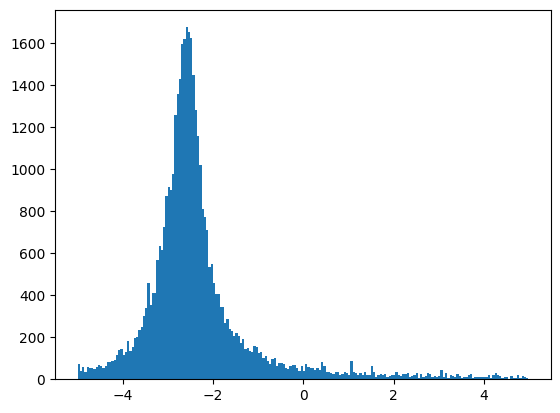

In [155]:
lowest_mcap = weighted_M[weighted_M['MCAP'] <= 1e7]
plt.hist(lowest_mcap["M-Score"], bins=200)

In [165]:
sum_by_quarter = weighted_M[['Quarter','MCAP']].groupby("Quarter").sum()
sum_by_quarter.rename(columns={"MCAP":"MCAP_Sum"}, inplace=True)
weighted_m_q_sums = pd.merge(weighted_M, sum_by_quarter, on="Quarter", how='left')
weighted_m_q_sums["Weight"] = weighted_m_q_sums.MCAP/weighted_m_q_sums.MCAP_Sum
weighted_m_q_sums.head()

,Key,Company,TICKER,Year,date_x,Quarter,M-Score,date_y,MCAP,Weighted_M,MCAP_Sum,Weight
0,1115,ADAC LABORATORIES,ADAC,1982,1982-03-31,1982Q1,-2.560610,1982-03-31,60977.250,-156138.963898,1.033639e+08,0.000590
1,1115,ADAC LABORATORIES,ADAC,1982,1982-06-30,1982Q2,-2.553592,1982-06-30,82398.250,-210411.471244,1.039159e+08,0.000793
2,1115,ADAC LABORATORIES,ADAC,1982,1982-09-30,1982Q3,-3.468174,1982-09-30,98750.000,-342482.200625,1.151933e+08,0.000857
3,1115,ADAC LABORATORIES,ADAC,1982,1982-12-31,1982Q4,-1.455851,1982-12-31,176563.375,-257050.010870,1.352481e+08,0.001305
4,1115,ADAC LABORATORIES,ADAC,1983,1983-03-31,1983Q1,-2.780615,1983-03-31,217586.250,-605023.489334,1.471230e+08,0.001479


In [182]:

weighted_M["Weighted_M"] = weighted_m_q_sums["M-Score"]*weighted_m_q_sums.Weight
weighted_M.drop(columns="date_y", inplace=True)
weighted_M.rename(columns={"date_x":"date"}, inplace=True)

In [183]:
weighted_M.head()

,Key,Company,TICKER,Year,date,Quarter,M-Score,MCAP,Weighted_M
0,1115,ADAC LABORATORIES,ADAC,1982,1982-03-31,1982Q1,-2.560610,60977.250,-0.001511
1,1115,ADAC LABORATORIES,ADAC,1982,1982-06-30,1982Q2,-2.553592,82398.250,-0.002025
2,1115,ADAC LABORATORIES,ADAC,1982,1982-09-30,1982Q3,-3.468174,98750.000,-0.002973
3,1115,ADAC LABORATORIES,ADAC,1982,1982-12-31,1982Q4,-1.455851,176563.375,-0.001901
4,1115,ADAC LABORATORIES,ADAC,1983,1983-03-31,1983Q1,-2.780615,217586.250,-0.004112


(array([1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 5.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        5.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 2.00

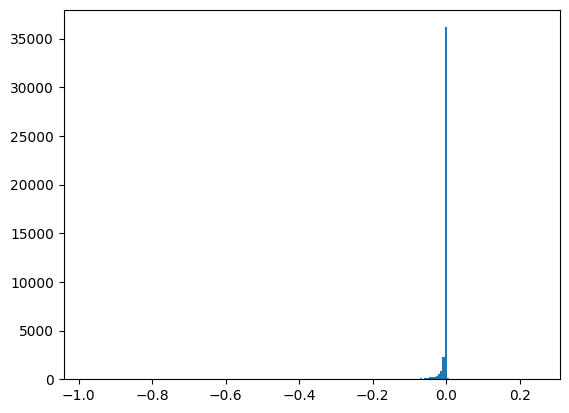

In [189]:
plt.hist(weighted_M["Weighted_M"][weighted_M["Weighted_M"] >= -1], bins=200)

### The below cell saved the final data set of each company's quarterly M-Score and weighted Quarterly M-Score. Will analyze and make vizualizations in other document.

In [190]:
weighted_M.to_csv('weighted_M.csv', encoding='utf-8', index=False,header=True)